In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import FormatStrFormatter

In [2]:
names = ['Number of soldiers', 'No of tanks', 'No of aircrafts', 'Victory']
dataset = pandas.read_csv('new_hab.csv', names=names)

In [3]:
dataset.head(5)

,Number of soldiers,No of tanks,No of aircrafts,Victory
0,2100000,4480,70,1
1,2100000,4340,210,1
2,2100000,4550,0,1
3,2170000,4130,140,1
4,2170000,4550,280,1


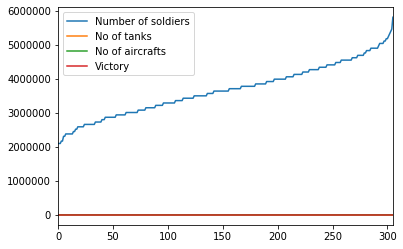

In [4]:
dataset.plot()
plt.show()

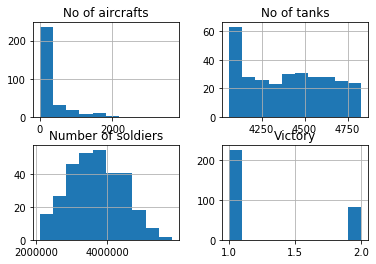

In [5]:
dataset.hist()
plt.show()

In [6]:
array = dataset.values
X = array[:,:3]
Y = array[:,3]
validation_size = 0.30
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
test_size=validation_size, random_state=seed)

In [7]:
num_folds = 20
num_instances = len(X_train)
seed = 10
scoring = 'accuracy'

In [8]:
algorithms = []
algorithms.append(('LR', LogisticRegression()))
algorithms.append(('LDA', LinearDiscriminantAnalysis()))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('CART', DecisionTreeClassifier()))
algorithms.append(('NB', GaussianNB()))
algorithms.append(('SVM', SVC()))
algorithms.append(('NN', MLPClassifier()))
algorithms.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, algorithm in algorithms:
    kfold = KFold(n_splits=2, random_state=None, shuffle=False)
    cv_results = cross_val_score(algorithm, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.724299 (0.004673)
LDA: 0.710280 (0.009346)
KNN: 0.635514 (0.028037)
CART: 0.630841 (0.032710)
NB: 0.733645 (0.023364)
SVM: 0.714953 (0.004673)


/Users/priyambasu/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NN: 0.714953 (0.004673)
RFC: 0.658879 (0.004673)


In [9]:
knn =  KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.75
[[68  4]
 [19  1]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.86        72
           2       0.20      0.05      0.08        20

    accuracy                           0.75        92
   macro avg       0.49      0.50      0.47        92
weighted avg       0.66      0.75      0.69        92



In [10]:
df_data = {'No of tanks': [2380,2380],
           'No of soldiers': [4060,4620],
           'No of aircrafts': [2100,630]}
df = pandas.DataFrame(df_data)
print(df)

   No of tanks  No of soldiers  No of aircrafts
0         2380            4060             2100
1         2380            4620              630


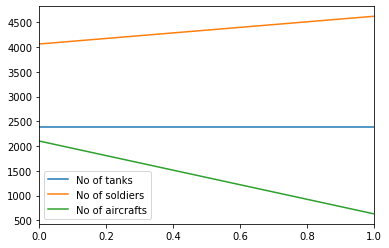

In [11]:
df.plot()
plt.show()

In [12]:
prediction = knn.predict(df)
print("Prediction of data survival status: {}".format(prediction))

Prediction of data survival status: [1 1]


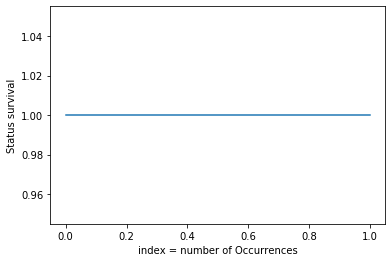

In [13]:
plt.plot(prediction)
plt.ylabel('Status survival')
plt.xlabel('index = number of Occurrences')
plt.show()